# 2CS SIQ2-SIL2 TP01. Régression linéaire et logistique binaire

Dans ce TP, nous allons traiter la régression linéaire et logistique binaire.
Dans la partie I, nous allons implémenter les deux méthodes en utilisant numpy.
Dans la partie II, quelques expérimentations serons présentées où nous devons discuter les résulats.

- **Binôme 01** : HEBBAL Zakaria
- **Binôme 02** : BENTAYEB Mohamed Amine



In [ ]:
import matplotlib
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.22.4', '1.4.4', '3.5.3')

In [5]:
from typing          import Tuple, List, Type
from collections.abc import Callable
import sklearn

sklearn.__version__

'1.2.2'

## I. Réalisation des algorithmes

Dans cette partie, nous allons implémenter les fonctions de régression à partir de zéro (from scratch). 
Cela va nous permettre à comprendre COMMENT les algorithmes fonctionnent : leurs complexités (temporelles et spatiales) et leurs paramètres.
Pour ce faire, nous allons utiliser la bibliothèque **numpy** qui est utile dans les calcules surtout matricielles.

### I.1. Régression linéaire

Premièrement, nous allons implémenter les fonctions nécessaire pour la régression linéaire.

#### I.1.1. Fonction de prédiction

$$Z = zf(X, theta) = \theta_0 + \sum\limits_{j=1}^{N} \theta_j X_j = \sum\limits_{j=0}^{N} \theta_j X_j | X_0 = 1 $$

- **X[M, N]** : une matrice de M échantillons et N caractéristiques. Afin d'introduire $\theta_0$, cette matrice est augmentée par une colonne $X_0 = 1$. Supposons que cela est déjà fait. Donc, la caractéristique 0  est le biais.
- **$\theta$[N]** : un vecteur des paramètres (poids des caractéristiques). Supposons que le biais est déjà ajouté.
- **Z(X, $\theta$)[M]** : un vecteur des préditions de chaque échantillon.

In [6]:
# TODO: Combinaison linéaire
def zf(X ,Theta) :
  return np.matmul(X,Theta)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([1. , 1.7, 2.4])
#---------------------------------------------------------------------
X_t     = np.array([[1., 100.], 
                    [1., 200.], 
                    [1., 300.]])
Theta_t = np.array([0.3, 0.007])
zf(X_t, Theta_t)

array([1. , 1.7, 2.4])

#### I.1.2. Fonction du coût

La fonction du coût calcule l'erreur d'estimation. 
Ici, nous allons utiliser l'erreur quadratique moyenne (MSE: mean square error). 

$$J = MSE(Y, H) = \frac{1}{2M} \sum\limits_{i=1}^{M} (Y - H)^2$$

- **Y[M]** : un vecteur des sorties réelles.
- **H[M]** : un vecteur des prédictions où $H = Z(X, \theta)$.
- **MSE(Y, H)** : une valeur réelle représentant l'erreur de régression.

In [7]:
# TODO: Fonction du coût MSE
def MSE(Y ,H):
    A=(Y-H)**2
    sum=np.average(A,axis=0)/2
    return sum


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 0.016666666666666673
#---------------------------------------------------------------------
H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])
MSE(Y_t, H_t)

0.016666666666666673

Le gradient de cette fonction est calculé comme suit (Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$) : 

$$\frac{\partial MSE}{\partial \theta_j} 
= \frac{\partial }{\partial \theta_j} \frac{1}{2M} \sum\limits_{i=1}^{M} (Y^{(i)} - H^{(i)})^2 
= \frac{1}{2M} \sum\limits_{i=1}^{M} [\frac{\partial }{\partial \theta_j} (Y^{(i)} - H^{(i)})^2]
= \frac{1}{2M} \sum\limits_{i=1}^{M} [-2 (Y^{(i)} - H^{(i)}) \frac{\partial }{\partial \theta_j} H^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j}
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}]
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \theta_j X_j^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- **X[M, N]** : une matrice de M échantillons et N caractéristiques. 
- **Y[M]** : un vecteur des sorties réelles.
- **H[M]** : un vecteur des prédictions où $H = Z(X, \theta)$.
- **dMSE(X, Y, H)[N]** : les gradients de chaque caractéristique.

In [10]:
# TODO: Gradients MSE
def dMSE(X,Y, H):
    A=H-Y
    B=np.matmul(A,X)
    B=B/len(Y)
    return B
#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([ -0.13333333, -30.        ])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], 
                [1., 200.], 
                [1., 300.]])
H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])
dMSE(X_t, Y_t, H_t)

array([ -0.13333333, -30.        ])

### I.2. Régression logistique

Ici, nous allons implémenter la régression logistique qui est basée sur la combinaison linéaire de la régression linaire.
Il suffit d'appliquer la fonction logistique sur cette combinaison afin de la transformer à une probabilité.

#### I.2.1. Fonction de prédiction

La fonction logistique est calculée comme suit :

$$\sigma(Z) = \frac{1}{1+e^{-Z}}$$

- **Z[M]** : un vecteur des sommes pondérées $Z(X, \theta)$.
- **$\sigma$(Z)[M]** : un vecteur des prédictions. 
- Normalement, cette fonction doit marcher avec un scalaire, un vecteur ou une matrice. Pour l'instant, nous nous intéressons par le cas d'un vecteur.

In [11]:
# TODO: Fonction logistique
def sg(Z): 
    return 1/(1+np.exp(-Z))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([0.26894142, 0.73105858])
#---------------------------------------------------------------------
sg(np.array([-1, 1]))

array([0.26894142, 0.73105858])

La fonction de prédiction sera :

$$H(X, \theta) = \sigma(Z(X, \theta)) $$

- **X[M, N]** : une matrice de M échantillons et N caractéristiques.
- **$\theta$[N]** : un vecteur des paramètres (poids des caractéristiques).
- **Z(X, $\theta$)[M]** : un vecteur des sommes pondérées de chaque échantillon.
- **H(X, $\theta$)[M]** : un vecteur des prédictions de chaque échantillon.

In [13]:
# TODO: Prédiction (régression logistique)
def Hf_log(X , Theta ):
  return sg(zf(X , Theta))
    

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([0.73105858, 0.55724785, 0.14185106])
#---------------------------------------------------------------------
X_t = np.array([[1., -100.], 
                [1.,   10.], 
                [1., 300.]])
Theta_t = np.array([0.3, -0.007])
Hf_log(X_t, Theta_t)

array([0.73105858, 0.55724785, 0.14185106])

#### I.2.2. Fonction du coût

Ici, nous allons utiliser l'entropie croisée binaire (BCE: Binary Cross Entropy Loss) comme fonction du coût.
C'est la fontion utilisée dans le cas de classement binaire.

$$BCE(Y^{(i)}, H^{(i)})
= \begin{cases}
- \log(H^{(i)}) & \text{ si } Y^{(i)} = 1\\ 
- \log(1 - H^{(i)})  & \text{ si } Y^{(i)} = 0
\end{cases}
$$
Puisque $Y^{(i)} \in \{0, 1\}$, donc : 

$$ BCE(Y^{(i)}, H^{(i)}) = - Y^{(i)} \log(H^{(i)}) - (1- Y^{(i)}) \log(1 - H^{(i)}) $$

$$J = BCE(Y, H) = \frac{-1}{M} \sum\limits_{i=1}^{M} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]$$

En pratique, on doit ajouter une petite valeur $\epsilon$ à l'argument de la fonction $\log$ afin d'éviter $\log(0)$.

- **Y[M]** : un vecteur des sorties réelles.
- **H[M]** : un vecteur des prédictions.
- **BCE(Y, H)** : une valeur réelle représentant l'erreur de classement.

In [14]:
# TODO: Fonction du coût BCE
def BCE(Y,H,eps ) -> float: 
    A=np.multiply(Y , np.log(eps+H)) 
    B= np.multiply(1-Y , np.log(eps+1-H))
    C=A+B
    return -1*np.average(C)
#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat (sans epsilon, avec) : (0.6181210324473608, 0.61812101133625)
#---------------------------------------------------------------------
Y_t = np.array([1., 0., 0., 1.])
H_t = np.array([0.25, 0.25, 0.5, 0.9])
BCE(Y_t, H_t, eps=0), BCE(Y_t, H_t, eps=0.00015)

(0.6181210324473608, 0.6178044304816226)

Le gradient de cette fonction est calculé comme suit : 

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{\partial}{\partial \theta_j} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{\partial}{\partial \theta_j} \log(H^{(i)}) + (1- Y^{(i)}) \frac{\partial}{\partial \theta_j}\log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{1}{H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)} + (1- Y^{(i)}) \frac{-1}{1-H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)})]
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} \frac{\partial}{\partial \theta_j} H^{(i)}
$$

$$\frac{\partial H^{(i)}}{\partial \theta_j} 
= \frac{\partial \sigma(Z^{(i)})}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial \theta_j} 
= [\sigma(Z^{(i)}) (1-\sigma(Z^{(i)}))]\frac{\partial}{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}  
= H^{(i)} (1-H^{(i)})  X_j^{(i)}
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} [H^{(i)} (1-H^{(i)}) X_j^{(i)}]
$$

$$\frac{\partial BCE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- 
Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$

In [15]:
# La fonction de gradient BCE est la même que celle de MSE
# Donc, je vais l'implémenter moi-même puisque c'est facile
dBCE = dMSE

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([-0.08333333, -0.25      ])
#---------------------------------------------------------------------
X_t = np.array([[1., 5.], 
                [1., 10.], 
                [1., 8]])
H_t = np.array([2.75, 5.25, 4.25])
Y_t = np.array([3., 5., 4.5])
dMSE(X_t, Y_t, H_t)

array([-0.08333333, -0.25      ])

### I.3. Descente du gradient 

La descente du gradient est un algorithme itératif.
Pour chaque itération, nous calculons l'erreur et le gradient.
Ensuite, nous mettons à jours les paramètres en se basant sur ces gradients.
Si la condition d'arrêt est satisfaite, nous sortons de l'algorithme.

#### I.3.1. Arrêt de la descente

Dans notre cas, la fonction d'arrêt est basée sur ces arguments :
- L'erreur courante $Jc$ et l'erreur passée $Jp$
- Le maximum des itérations $IT$ et l'itération courante $it$

Cette fonction retourne $True$ si :
- Le nombre maximal des itérations a été atteint
- L'argument $up=True$ et l'erreur a augmenté

In [16]:
# TODO: Fonction d'arret de la descente du gradient
def arreter(Jp: float    , 
            Jc: float    , 
            IT: int      , 
            it: int      , 
            up: bool=True) -> bool:
   return (it==IT) or (up==True and Jc>Jp)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (False, True, True, False)
#---------------------------------------------------------------------
arreter(0.5, 0.2, 100, 0), \
arreter(0.1, 0.2, 100, 5), \
arreter(0.5, 0.2, 100, 100), \
arreter(0.1, 0.2, 100, 5, up=False)

(False, True, True, False)

#### I.3.2. Mise à jours des paramètres

Rendre de nouveaux paramètres mis à jours en se basant sur les anciens paramètres $\theta$, le gradient $\frac{\partial J}{\partial \theta_j}$ et le taux d'apprentissage $\alpha$.

$$\forall j \le N, \theta_j = \theta_j - \alpha \frac{\partial J}{\partial \theta}$$

Il faut rendre un vecteur des paramètres mis à jours sans modifier l'original (principe d'atomacité)

In [18]:
# TODO: Mise à jours des paramètres
def maj_param(Theta: 'np.ndarray[N]', 
              dJ   : 'np.ndarray[N]', 
              alpha: float          ) -> 'np.ndarray[N]':
    
    return Theta-alpha*dJ 

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([0.30013333, 0.037     ])
#---------------------------------------------------------------------
Theta_t = np.array([0.3, 0.007])
Gradient_t = np.array([ -0.13333333, -30.])
alpha_t = 0.001
maj_param(Theta_t, Gradient_t, alpha_t)

array([0.30013333, 0.037     ])

#### I.3.3. Descente du gradient 

**Rien à programmer ici**

Dans cette fonction, nous allons itérer jusqu'à arriver au nombre max des itérations (pas d'autres conditions d'arrêt).

- **X[M, N]** : une matrice de M échantillons et N caractéristiques.
- **Y[M]** : un vecteur des sorties réelles.
- **$\theta$[N]** : un vecteur des paramètres (poids des caractéristiques).


In [19]:
# La fonction de la descente du gradient
def descente(X    : 'np.ndarray[M, N]', # Matrice des echantillons (obligatoire)
             Y    : 'np.ndarray[M]'   , # Vecteur des classes (obligatoire)
             Theta: 'np.ndarray[N]'   , # Paramètres (obligatoire)
             IT   : int      = 100    , # nombre maximal des itérations
             alpha: float    = 0.01   , # taux d'apprentissage
             up   : bool     = False  , # si on s'arrete si l'erreur augmente
             Hf   : Callable = Hf_log , # la fonction qui calule la sortie
             Jf   : Callable = BCE    , # la fonction du coût
             dJf  : Callable = dBCE     # la fonction du gradient
            ) -> Tuple[List[np.ndarray], List[float]]: 
     
    couts  = []           # historique des coûts
    Thetas = []           # historique des thetas
    Theta  = Theta.copy() # une copie pour garder le contenu de Theta original
    
    Hp = Hf(X, Theta)
    Jp = Jf(Y, Hp, eps=0.00001)
    it = 0
    
    # Ici, boucle infinie jusqu'à ce que la condition d'arrêt est atteinte 
    while True:
        Thetas.append(Theta.copy()) # garder une copie des paramètres
        couts.append(Jp) # ajouter l'erreur passée
    
        dJ = dJf(X, Y, Hp) # calculer les gradients passées
        Theta = maj_param(Theta, dJ, alpha) # mettre à jours les paramètres
        Hc = Hf(X, Theta) # calculer la nouvelle sortie
        Jc = Jf(Y, Hc,eps=0.00001) # calculer la nouvelle erreur
        
        it += 1 
        
        if arreter(Jp, Jc, IT, it, up=up):
            break # si la condition d'arrêt est satisfaite, sortir
        
        Jp = Jc
        Hp = Hc
        
    return Thetas, couts

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (array([ 0.66632271, -0.12058394,  0.93814202]), 0.6851969300532375)
#---------------------------------------------------------------------

X_t = np.array([
    [1, 1, 0.2],
    [1, 2, 0.1],
    [1, 3, 0.4],
    [1, 4, 0.3]
])

Theta_t = np.array([1., 1., 1.])

Y_t = np.array([1, 0, 1, 0])

Theta_P, J_P = descente(X_t, Y_t, Theta_t)

Theta_P[-1], J_P[-1]

(array([ 0.66632271, -0.12058394,  0.93814202]), 0.6851763009679036)

### I.4. Regrouper les fonctions 

**Rien à programmer ici**

Nous voulons créer une classe qui supporte la régression linéaire et la régression logistique.


In [21]:
# la fonction de normalisation
# X: un vecteur de M échantillons et N caractéristiques
# mean: un vecteur de N nombres qui représentent les moyennes des caractéristiques
# std: un vecteur de N nombres qui représentent les écarts types des caractéristiques
# si mean et std ne sont pas donnés, ils vont êtres calculés à partir de X
def normaliser(X, mean=None, std=None): 
    if (mean is None) or (std is None): 
        mean = np.mean(X, axis=0) 
        std  = np.std (X, axis=0)
    X_norm = np.where(std==0, X, (X - mean)/std)
    return X_norm, mean, std

def preparer(X, norm=True, const=True, mean=None, std=None): 
    X_pre = X.copy()
    if norm: 
        X_pre, mean, std = normaliser(X_pre, mean=mean, std=std)
    if const:
        X_pre = np.append(np.ones((X_pre.shape[0], 1)), X_pre, axis=1)
    return X_pre, mean, std

def generer_zeros_1(nbr):
    return np.zeros(nbr)

def generer_uns_1(nbr):
    return np.ones(nbr)

def generer_aleatoire_1(nbr):
    return np.random.rand(nbr)


class Regression(object):
    def __init__(self, alpha=.01, log=True, norm=True, const=True): 
        
        self.norm  = norm
        self.const = const
        self.alpha = alpha
        self.log   = log
        
        if log: # Régression logistique
            self.Hf  = Hf_log 
            self.Jf  = BCE
            self.dJf = dBCE
        else: # Régression linéaire
            self.Hf  = zf
            self.Jf  = MSE
            self.dJf = dMSE
        
    
    def entrainer(self, X, Y, IT=100, up=False): 
        X_pre, self.mean, self.std = preparer(X, norm=self.norm, const=self.const)
        Theta = generer_uns_1(X_pre.shape[1])# Supposons, les paramètres sont initialisés à 1
        self.Thetas, self.couts = descente(X_pre, 
                                           Y, 
                                           Theta, 
                                           IT     = IT, 
                                           alpha  = self.alpha, # arguments de régularisation
                                           up     = up,
                                           Hf     = self.Hf, # fonction logistique
                                           Jf     = self.Jf,
                                           dJf    = self.dJf
                                          )
        
    # La prédiction
    # si classes=True elle rend un vecteur de 1 et 0
    # sinon elle rend un vecteur de probabilités
    def predire(self, X, classes=True, seuil=0.5):
        X_pre, _, _ = preparer(X, 
                               norm  = self.norm, 
                               const = self.const, 
                               mean  = self.mean, 
                               std   = self.std
                              )
        H = self.Hf(X_pre, self.Thetas[-1])
        if self.log and classes:
            return (H >= seuil).astype(int)
        return H

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([0.86525915, 0.5317788 , 0.9614326 ])
#---------------------------------------------------------------------

X_t = np.array([
    [100, 20],
    [200, 10],
    [300, 40],
    [400, 30]
])

Y_t = np.array([1, 0, 1, 0])

# logistique
reglog = Regression()
reglog.entrainer(X_t, Y_t)

reglog.Thetas[-1]

array([0.86525915, 0.5317788 , 0.9614326 ])

## II. Application et analyse

Cette partie sert à appliquer les algorithmes, modifier les hyper-paramètres et analyser les résultats.
Son but est de comprendre comment les hyper-paramètres peuvent affeter le fonctionnement d'un algorithme.

### II.1. Régression linéaire

Pour tester la régression linéaire, nous allons essayer d'estimer les prix des maisons en se basant sur leurs superficies.
Pour ce faire, nous allons diviser notre dataset en deux : 80% pour l'entraînement et 20% pour le test (nous avons désactivé la dividion aléatoire afin d'avoir les mêmes résultats à chaque exécution).

In [23]:
header = ['Superficie', 'Prix']
houses = pd.read_csv('data/houses.csv', names=header)

houses.head()

,Superficie,Prix
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [24]:
from sklearn.model_selection import train_test_split  

Xhouses = houses.iloc[:, :-1].values # Premières colonnes 
Yhouses = houses.iloc[:,  -1].values # Dernière colonne 

Xhouses_train, Xhouses_test, Yhouses_train, Yhouses_test = train_test_split(Xhouses, Yhouses, 
                                                                            test_size    = 0.2, 
                                                                            random_state = 0
                                                                           )  

len(Xhouses_train), len(Xhouses_test)

(37, 10)

#### II.1.1. Qualité de prediction 

Ici, nous voulons tester la qualité de prédiction de la régression linéaire : est-ce qu'elle estime les sorties d'une manière exacte ou au moins d'une manière rapprochée. 
Pour ce faire, nous avons entraîné notre modèle sur les données d'entraînement (en bleu). 
Ensuite, nous avons essayé d'estimer les résultats de test (en vert : les sorties réelles ; en magenta : les sorties estimées).

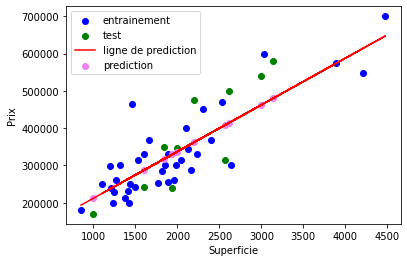

In [25]:
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline      import make_pipeline

# Entraînement d'un modèle de régression linéaire 
regresseur1 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
regresseur1.fit(Xhouses_train, Yhouses_train)

Yhouses_pred = regresseur1.predict(Xhouses_test )
Yhouses_line = regresseur1.predict(Xhouses_train)  

# Visualiser la distribution des données d'entraînement et de test
# Aussi, la ligne de prédiction et la prédiction du dataset de test
plt.scatter(Xhouses_train, Yhouses_train, color='blue'  , label = 'entrainement'       )
plt.scatter(Xhouses_test , Yhouses_test , color='green' , label = 'test'               )
plt.plot   (Xhouses_train, Yhouses_line , color='red'   , label = 'ligne de prediction')
plt.scatter(Xhouses_test , Yhouses_pred , color='violet', label = 'prediction'         )
plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()

**TODO: Analyser les résultats**

- Est-ce que la régression linéaire peut prédire exactement les valeurs Y ?
- Pourquoi ?

**Réponse**

- On ne peux pas vraiment prédicter une valeur exacte des valeurs Y 
- Les données n'étant pas vraiment linéaires, il y a toujours du bruit qui ne peut pas être modélisé par une fonction linéaire, ce qui entraîne une petite marge d'erreur sur les résultats (Y).

#### II.1.2. Biais

Ici, nous voulons tester l'effet du biais et s'il est toujours utile.
Pour ce faire, nous avons entraîné un autre modèle sans biais.
Nous avons calculer l'erreur des deux modèles.

In [26]:
from sklearn.metrics       import mean_squared_error
from sklearn.metrics       import mean_absolute_error

# Entraînement d'un modèle de régression linéaire sans biais
regresseur2 = make_pipeline(StandardScaler(with_mean=False), LinearRegression(fit_intercept=False))
regresseur2.fit(Xhouses_train, Yhouses_train)

Yhouses_pred2 = regresseur2.predict(Xhouses_test )


pd.DataFrame({
    'Modèle'         : ['avec biais', 'sans biais'],
    'Erreur (MSE)'   : [mean_squared_error(Yhouses_test, Yhouses_pred), 
                        mean_squared_error(Yhouses_test, Yhouses_pred2)],
    'Erreur (MAE)'   : [mean_absolute_error(Yhouses_test, Yhouses_pred), 
                        mean_absolute_error(Yhouses_test, Yhouses_pred2)],
})

,Modèle,Erreur (MSE),Erreur (MAE)
0,avec biais,5.821821e+09,69100.263620
1,sans biais,4.646623e+09,58764.434393


**TODO: Analyser les résultats**

En se basant sur l'erreur :
- Est-ce que le biais est toujours utile ?
- Expliquer pourquoi le 2ieme modèle a eu une meilleure performance ?

**Réponse**

- NON , pas toujours
- Dans le cas ou on as des valeurs des données qui commence a partir d'une valeur trés grande ( valeurs de données  tres grands )(données non normalisé et non centré) c'est mieux d'utiliser un biais pour se rapprocher des  valeurs de données, sinon pour des données petits(données centré et normalisé) on peux négliger le biais(c'est mieux de ne pas utiliser le biais), Dans notre cas le deuxiéme modéle (sans biais) a eu de meilleur performance car on est dans le cas de données normalisé et centré.   

### II.2. Régression logistique binaire

Pour tester la régression logistique, nous allons essayer d'estimer si un étudiant est admis en se basant sur deux notes.
Bien sûr, il est admis si la moyenne des deux notes est supérieure ou égale à 10. 
Dans ce cas, la séparation entre admis et non admis est linèaire.
Les données d'entraînement et de test ont été générées automatiquement en utilisant le script joint à ce TP.

In [27]:
notes = pd.read_csv('data/notes.csv')

# Extraction des caractéristiques 
X_notes = notes.iloc[:, :-1].values # Premières colonnes 
Y_notes = notes.iloc[:,  -1].values # Dernière colonne 

X_notes_norm = X_notes/20 # Nous savons le maximum

# créer un normalisateur pour apprendre de l'entrainement et clip avec le test
# puisque nous savons la valeur max et min
# cette etape est inutile => commenter

# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler(clip=True) 
# X_notes_norm = mms.fit_transform(X_notes)

notes.head()

,Note1,Note2,Admis
0,9.75,16.00,1
1,2.25,9.50,0
2,4.50,2.50,0
3,15.50,10.25,1
4,3.25,19.50,1


#### II.2.1. Normalisation et convergence 

Nous voulons tester l'effet de la normalisation sur la vitesse de convergence du modèle.
Pour ce faire, nous avons entraîné deux modèles : un sans normalisation et l'autre avec normalisation.

**Remarque** : le coût n'est pas lisse puisqu'on applique une seule itération avec "warm start" afin de controler les iteration en dehors du modèle (récupérer les erreurs pour chaque itération).

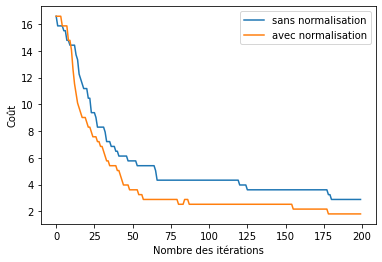

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# ce block du code est pour filtrer les avertissements concernant la convergence du modèle
# en général, lorsque e nombre des itérations n'est pas suffisant pour atteindre l'erreur minimale
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

ALPHA = 0.01
ITMAX = 200

# Création des modèles
# sans normalisation
# reg_log_nonorm = LogisticRegression(penalty=None, max_iter=1, warm_start=True) 
reg_log_nonorm = SGDClassifier(penalty=None, 
                               max_iter=1, 
                               warm_start=True, 
                               loss='log_loss',
                               learning_rate='constant', 
                               eta0=ALPHA, shuffle=False)
# avec normalisation
# reg_log_norm   = LogisticRegression(penalty=None, max_iter=1, warm_start=True)   
reg_log_norm = SGDClassifier(penalty=None, 
                               max_iter=1, 
                               warm_start=True, 
                               loss='log_loss',
                               learning_rate='constant', 
                               eta0=ALPHA, shuffle=False)

# Entraînement des modèles
couts_nonorm = []
couts_norm   = []
for it in range(ITMAX):
    reg_log_nonorm.fit(X_notes, Y_notes)
    reg_log_norm.fit(X_notes_norm, Y_notes)
    couts_nonorm.append(log_loss(Y_notes, reg_log_nonorm.predict(X_notes)))
    couts_norm.append(log_loss(Y_notes, reg_log_norm.predict(X_notes_norm)))

# Visualisation de la convergence
plt.plot(couts_nonorm, label = 'sans normalisation')
plt.plot(couts_norm  , label = 'avec normalisation')
plt.xlabel('Nombre des itérations')
plt.ylabel('Coût')
plt.legend()
#plt.autoscale()
plt.show()

**TODO: Analyser les résultats**

- Que remarquez-vous ?
- Donner une hypothèse (vitesse de convergence avec normalisation)
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours.

**Réponse**

- On remarque  que pour un petit nombre d'itérations  la convergance est presque la meme pour les deux cas ( avec et sans normalaisation ) , et plus en augmente le nombre d'itérations plus on remarque qu'avec normalisation est plus rapide que sans normalisation ,  comme on remarque que le cout diminue pour des grands valeures de nombre d'itérations pour les deux cas. 
 En resumé  , le modéle avec normalisation converge plus rapidement que sans normalisation 
- La convergence dans le cas avec  normalisation est  plus rapide que sans normalisaton.si on normalise pas alors nous aurons un gradient trés grand (plus important) pour les poids liées a l'une des caractérestique par rapport aux gradients des autres poids , ce qui vas empêcher l'algorithme de converger vers l'optima(minimum)

- Avec la normalisation des données on reduit l'ecart de valeur entre les différentes variables , ce qui permet de trouver plus rapidement des optima  , ce qui peut redruire le nombre d'itérations pour ceonverger , et nous donne une convergence plus rapide.
en résumé on peux justifier par la mise a jour des paramétres lors du descent gradient.Et le faite qu'avec la normalisation les valeurs sont plus petites on aura donc des petits pas ce qui nous permet d'éviter la divergence.



#### II.2.2. Taux d'apprentissage et convergence 

Ici, nous avons varié le taux d'apprentissage et affiché les courbes de la fonction objective en fonction de nombre d'itérations. 
Nous voulons tester l'effet du taux d'apprentissage sur la convergence de notre modèle de régression.


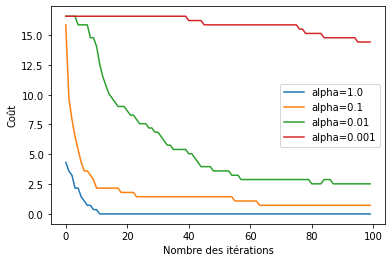

In [29]:
from sklearn.linear_model import SGDClassifier

ITMAX  = 100
alphas = [1., 0.1, 0.01, 0.001]

# Création et entraînement des nouveaux modèles de régression linéaire
for alpha in alphas:
    # Création d'un nouveau modèle de régression linéaire
    modele = SGDClassifier(penalty=None, 
                          max_iter=1, 
                          warm_start=True, 
                          loss='log_loss',
                          learning_rate='constant', 
                          eta0=alpha, shuffle=False)
    couts = []
    for it in range(ITMAX):
        # Entraînement du modèle
        modele.fit(X_notes_norm, Y_notes)
        couts.append(log_loss(Y_notes, modele.predict(X_notes_norm)))
        
    # Visualisation de la convergence
    plt.plot(couts, label = 'alpha=' + str(alpha))
    
plt.xlabel('Nombre des itérations')
plt.ylabel('Coût')
plt.legend()
#plt.autoscale()
plt.show()

**TODO: Analyser les résultats**

- Que remarquez-vous ? (Il faut décrire les résultats).
- Donner une hypothèse concernant le rapport entre le taux et la vitesse de convergence.
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours.
- Pourquoi nous ne devons pas utiliser un taux égale à 1 avec seulement une itération en pratique (quel est le risque) ?

**Réponse**

- On remarque que pour alpha=0.001 on  ontien un trés grand coût qui est  presque un  stable pour toute valeur de nombre d'itérations. et que plus on augment ce parametre on le multipliant par 10 on obtient un coût qui se diminue a chaque fosi qu'on augmente le nombre d'itérations , pour une  alpha=0.01 le coût au début est le meme que celui de alpha=0.001 et on remarque qu'il se diminue en augemntant le nombre d'itération et qu'il se stabilise pour toute valeur >60 de nombre d'itérations , et pour une  alpha=0.1 le coût au début est le presque meme que celui de alpha=0.001 et on remarque qu'il se diminue rapidement  en augementant le nombre d'itérations et qu'il se stabilise a une valeur plus petite que celle de alpha = 0.01 pour toute valeur >65 de nombre d'itération , et pour une alpha=1 on remarque que le coût est initialament  inférieur a 5 qui est trés petit parapport au autres cas , et qu'il ce diminue en augmentant le nombre d'itérations , et il se stablise pour une valeur >10 de nombre d'itérations a une valeur trés petite par rapport au autres cas.

**en resumé , pour les quatres taux le coût diminue en augmentant le nombre d'itérations et l'algorithme converge toujours vers un coût qui est optimale pour toutes valeurs de alpha(les quatres)**

- Lorsque nous diminuons la valeur d'alpha(taux), la vitesse de convergence diminue, nous avons une relation proportionnelle entre ces deux éléments.
- On utilisons une grande valeur de alpha on avance avec grands pas   ce qui permet d'arriver plus rapidemenet a l'optimum global  , ce qui réduit le nobre d'itéraions pour arriver a la convergence,et qui nous donne une convergence plus rapide et pour un petit taux l'algorithme avance avec des petits pas ce qui diminue la vitesse de convergence .sachant que si on prend une grande valeur de ce taux on peut rater le minimum ce qui causera une divergence.
- Nous ne devons pas utiliser un taux égale à 1 avec seulement une itération en pratique car 1 est un taux trés grand ,  on risque d'avoir une divergence  , meme on peux rater le minimum global et ne pas l'atteindre,  . 

#### II.2.3. Complexité du modèle et séparation

Nous voulons améliorer la séparation entre les deux classes : "admis" et "non admis". 
Pour ce faire, nous avons essayer d'utiliser des caractéristiques complexes : $X^3$ et $X^5$.

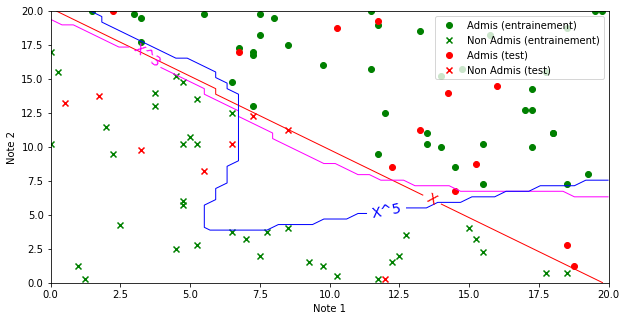

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LogisticRegression

degres = [3, 5]
couleurs=['red', 'magenta', 'blue']

# Une fonction pour dessiner le plan de séparation binaire étant donnée un modèle
# modele : c'est un modèle enttraîné pour la prédiction binaire
# ax: un objet de type matplotlib.axes.Axes; les axes sur lesquels on va dessiner
# xrange: une liste des points sur l'axe X
# yrange: une liste des points sur l'axe Y
# couleur: la couleur du dessin (de la ligne de séparation)
# label: l'étiquêtte du dessin (la ligne de séparation)
def dessiner2D(modele, ax, xrange, yrange, couleur='red', label=''):
    # Créer une matrice de (xrange X yrange): notre plan de dessin
    XX   = [[[xr, yr] for xr in xrange] for yr in yrange]
    # Représenter le sous forme d'une matrice de (xrange X yrange)/2 échantillons et 2 caractéristiques
    XX   = np.array(XX).reshape(-1, 2)
    # Prédire les probabilités (estimation) et retransformer vers notre plan (xrange X yrange)
    grid = modele.predict(XX).reshape(len(xrange), len(yrange))
    # Dessiner des lignes qui passent par les valeurs 0.5
    cs   = ax.contour(xrange, yrange, grid, colors=[couleur], linewidths=(1), linestyles=('-'),levels=[0.5])
    # Affecter l'étiquêtte à la ligne de séparation (qui es un contour dans notre cas)
    # plt.clabel(cs, inline=1, fontsize=10)
    # cs.collections[0].set_label(label)
    fmt = {cs.levels[0]: label}
    ax.clabel(cs, cs.levels, inline=True, fmt=fmt, fontsize=14)
    


X_notes_train = X_notes[:80, :]
X_notes_test  = X_notes[80:, :]
Y_notes_train = Y_notes[:80   ]
Y_notes_test  = Y_notes[80:   ]

# Trouver les indexes ordonnées 
idx2 = X_notes_train[:,0].argsort()

# Sélectionner le cas "admis" dans l'entraînement et le test
oui_train = Y_notes_train == 1
oui_test  = Y_notes_test  == 1

# Dessiner les cas "admis" et "Non admis" de l'entraînement et du test
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_notes_train[oui_train, 0], 
           X_notes_train[oui_train, 1], 
           color='green', marker='o', label='Admis (entrainement)')
ax.scatter(X_notes_train[~oui_train, 0], 
           X_notes_train[~oui_train, 1], 
           color='green', marker='x', label='Non Admis (entrainement)')
ax.scatter(X_notes_test[oui_test, 0], 
           X_notes_test[oui_test, 1], 
           color='red', marker='o', label='Admis (test)')
ax.scatter(X_notes_test[~oui_test, 0], 
           X_notes_test[~oui_test, 1], 
           color='red', marker='x', label='Non Admis (test)')

# Créer l'espace des notes : entre 0 et 20 avec une résolution de 50
xrange = np.linspace(0, 20, 50) # Note 1
yrange = np.linspace(0, 20, 50) # Note 2

# Dessiner la ligne de séparation dans une régression linéaire
reglog1 = LogisticRegression(penalty=None)
reglog1.fit(X_notes_train, Y_notes_train)
dessiner2D(reglog1, ax, xrange, yrange, label='X')

modeles = [reglog1]

# Dessiner la ligne de séparation dans une régression polynomiale
# Le modèle dans ce cas est un pipeline qui commence par créer des caractéristiques polynomiales
# ensuite passe le résultat vers un modèle de régression logistique
for i in range(len(degres)):
    modele = make_pipeline(PolynomialFeatures(degree=degres[i], include_bias=False),
                           LogisticRegression(penalty=None))
    modele.fit(X_notes_train, Y_notes_train)
    dessiner2D(modele, ax, xrange, yrange, couleur=couleurs[i+1], label='X^' + str(degres[i]))
    modeles.append(modele)

plt.xlabel('Note 1')
plt.ylabel('Note 2')
plt.legend(loc='upper right')
plt.show()

**TODO: Analyser les résultats**

- Que remarquez-vous (les nouveaux modèles ont-ils été capables d'améliorer le modèle initial: l'adjustement/fitting et la généralisation) ? 
- Donner une hypothèse (Quelle est la raison d'amélioration/détérioration ?) 
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours.

**Réponse**

- Les nouveaux modèles sont mieux adaptés aux données d'apprentissage(entrainement), mais leur généralisation est inférieure à celle du modèle initial(l'ancien modèle est mieux généralisé)
- L'augmentation du nombre de paramtres du modéle a causé une détérioration, ce  qui a abouti à un Surapprentissage(overfitting)
- L'ajout de paramétres du modéle  peut augmenter son capacité de s'adapter aux données d'entrainement(surapprentissage), mais ça peut le rendre plus sensible au bruits dans les données.Ce qui peut conduire à de mauvais résultats lors des tests.